In [25]:
import torch 
from torch import nn
from torch import optim
import torchvision
from torchvision.transforms import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import warnings

warnings.filterwarnings("ignore")

torch.Size([3, 32, 32])


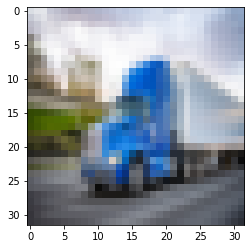

In [26]:
transform = transforms.Compose([transforms.Resize((32,32)),
                               transforms.ToTensor()])

flat_img = 3072  #32x32x3 --size of the flattened Image

img = Image.open('truck.jpeg')
real_img = transform(img)

torch.manual_seed(42)
fake_img = torch.rand(1,100)

real_img = transform(img)
plt.imshow(np.transpose(real_img.numpy(), (1, 2, 0)))
print(real_img.size())

In [3]:
torch.manual_seed(42)

fake_img = torch.rand(1, 100)
fake_img.size(), fake_img.min(), fake_img.max()

(torch.Size([1, 100]), tensor(0.0041), tensor(0.9811))

In [4]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
        nn.Linear(flat_img, 10000),
        nn.ReLU(),
        nn.Linear(10000, 1),
        nn.Sigmoid())
        
    def forward(self, img):
        img = img.view(1,-1)
        out = self.linear(img)
        
        return out

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
        nn.Linear(100, 10000),
        nn.LeakyReLU(),
        nn.Linear(10000, 4000),
        nn.LeakyReLU(),
        nn.Linear(4000, flat_img))
        
    def forward(self, latent_space):
        latent_space = latent_space.view(1,-1)
        
        out = self.linear(latent_space)
        
        return out

In [6]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    
discr = Discriminator().to(device)
gen = Generator().to(device)

In [7]:
opt_d = optim.SGD(discr.parameters(), lr=0.001, momentum=0.9)
opt_g = optim.SGD(gen.parameters(), lr=0.001, momentum=0.9)

criterion = nn.BCELoss()

In [8]:
epochs = 500
discr_e = 4
gen_e = 3

for epoch in tqdm(range(epochs), total=epochs):
    
    for k in range(discr_e):
        opt_d.zero_grad()
        out_d1 = discr(real_img.to(device))
        loss_d1 = criterion(out_d1, torch.ones((1, 1)).to(device))
        loss_d1.backward()
        
        
        out_d2 = gen(fake_img.to(device)).detach()
        loss_d2 = criterion(discr(out_d2.to(device)), torch.zeros((1, 1)).to(device))
        loss_d2.backward()

        opt_d.step()

    for i in range(gen_e):
        opt_g.zero_grad()
    
        out_g = gen(fake_img.to(device))
    #loss_g =  criterion(discr(out_g.to(device)), torch.ones(1, 1).to(device))

    #----Loss function in the GAN paper
        loss_g = 1.0 - (discr(out_g.to(device))) 
        loss_g.backward()

        opt_g.step()    

  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


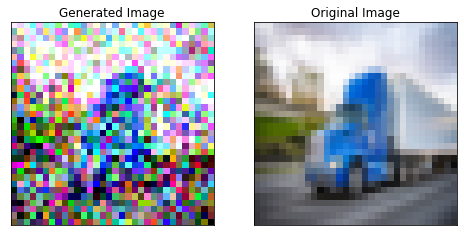

In [9]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.title("Generated Image")
plt.xticks([])
plt.yticks([])
plt.imshow(np.transpose(out_g.resize(3, 32, 32).cpu().detach().numpy(), (1, 2, 0)))

plt.subplot(1, 2, 2)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.imshow(np.transpose(real_img.numpy(), (1, 2, 0)))
plt.show()

In [12]:
# Save Generative model 
torch.save(gen, "C:/Users/ketul/Data Science/Paper2Code GAN/gen.pt")

In [17]:
torch.save(discr, "C:/Users/ketul/Data Science/Paper2Code GAN/discr.pt")

In [30]:
!pip show matplotlib

Name: matplotlib
Version: 3.5.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\ketul\anaconda3\envs\pytorch_env\lib\site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: 
